In [1]:
%matplotlib inline
from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3

In [2]:
def potential(M,N,K,dx,hbyL,acc,Niter):
    k = int(M*(1-hbyL))
    phi = zeros((M,N))
    phi[0] = np.ones((1,N))
    errors = ndarray((Niter,1))
    for _ in range(Niter):
        old_phi = phi.copy()
        phi[1:-1,1:-1] = 0.25*(phi[1:-1,0:-2]+
                               phi[1:-1,2:]+
                               phi[0:-2,1:-1]+
                               phi[2:,1:-1])
        phi[k] = ( K*(phi[k+1]) + phi[k-1] ) / (K+1)
        errors[_] = (abs(old_phi-phi).max())
    return phi

In [3]:
M = 200
N = 100
delta = 10/N
x = range(M-1,-1,-1)
y = np.arange(0,N)
Y,X = meshgrid(y,x)

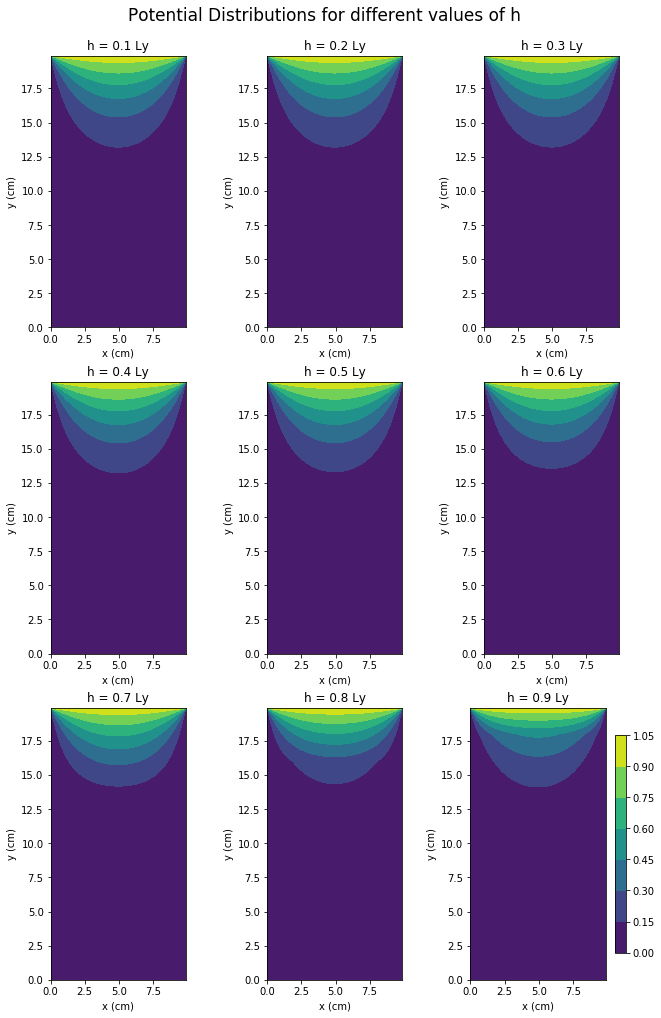

In [41]:
subplots(figsize=(11,17))
for i in range(1,10):
    phi = potential(M,N,2,1,i/10,1,15000)  
    subplot(3,3,i)
    CS = contourf(Y/10,X/10,phi)
    axis('scaled')    
    xlabel("x (cm)"); ylabel("y (cm)")
    title("h = 0."+str(i)+" Ly")
colorbar(CS, shrink=0.8, extend='both')
suptitle("Potential Distributions for different values of h", fontsize=17, y=0.92)
savefig("potential.png")
show()

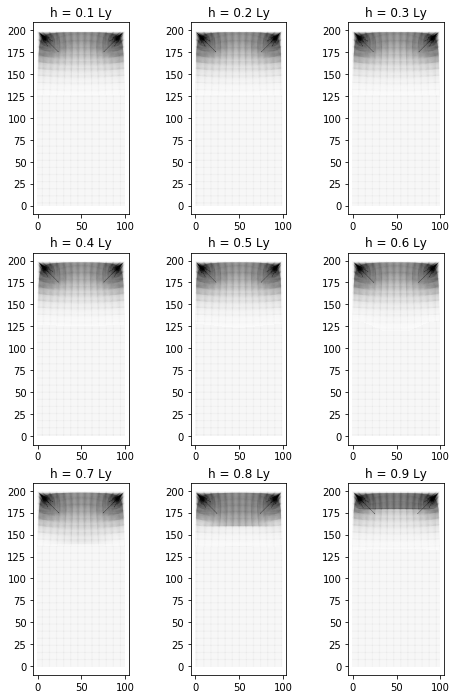

In [43]:
subplots(figsize=(8,12))
q_top = []
q_fluid = []
for i in range(1,10):
    k = int(M*(1-i/10))
    phi = potential(M,N,2,1,i/10,1,15000)  
    #initialising Ex, Ey arrays
    Ex = zeros((M, N))
    Ey = zeros((M, N))
    #filling Ex, Ey arrays with fields
    Ex[1:-1, 1:-1] = (phi[1:-1, 2:] - phi[1:-1, 0:-2])/delta
    Ey[1:-1, 1:-1] = (phi[2:, 1:-1] - phi[0:-2, 1:-1])/delta
    q_top.append(-sum(Ey[1])*delta)
    q_fluid_bottom = 2*(sum(Ey[-2]))*delta
    q_fluid_wall = 4*(sum(Ex[k:,1]))*delta
    q_fluid.append(q_fluid_bottom+q_fluid_wall)
    subplot(3,3,i)    
    quiver(Y, X, Ex, Ey)
    axis('scaled')    
    savefig("es"+str(i)+".png")
    title("h = 0."+str(i)+" Ly")
show()

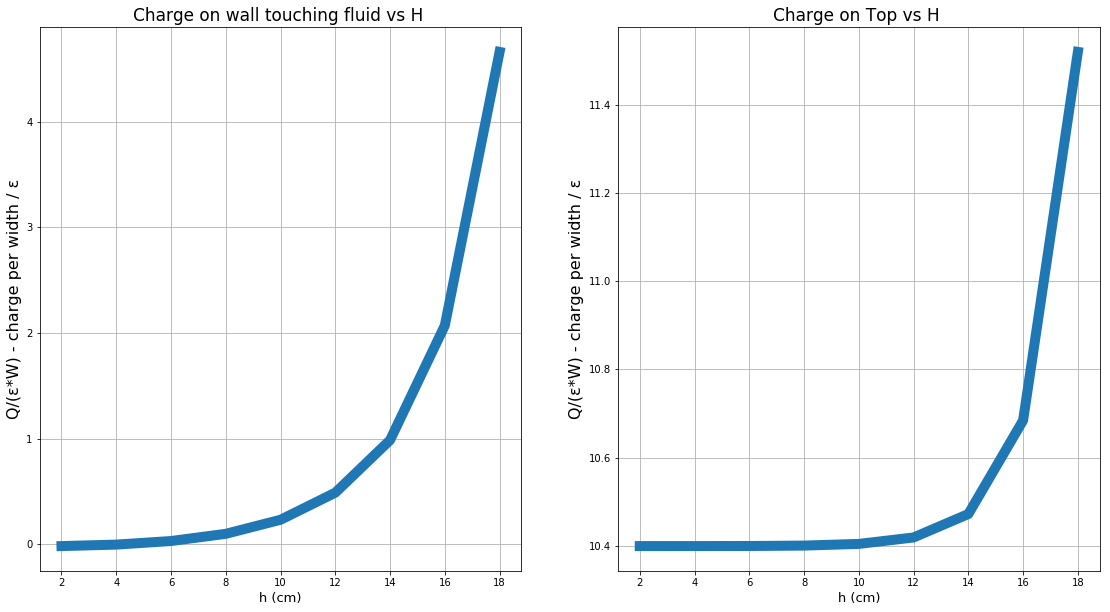

In [57]:
subplots(figsize=(19,10))
subplot(1,2,1)
plot(array(range(1,10))*2, q_fluid, linewidth=10)
title("Charge on wall touching fluid vs H ",fontsize = 17)
xlabel("h (cm)",fontsize = 13)
ylabel("Q/(\u03B5*W) - charge per width / \u03B5", fontsize = 16)
grid()
subplot(1,2,2)
plot(array(range(1,10))*2, q_top, linewidth=10)
title("Charge on Top vs H ",fontsize = 17)
xlabel("h (cm)",fontsize = 13)
ylabel("Q/(\u03B5*W) - charge per width / \u03B5", fontsize = 16)
grid()
savefig("charge.png")
show()

In [54]:
hbyL = 0.5
phi = potential(M,N,2,1,hbyL,1,15000)  
k = int(M*(1-hbyL))
#initialising Ex, Ey arrays
Ex = zeros((M, N))
Ey = zeros((M, N))

#filling Ex, Ey arrays with fields
Ex[1:-1, 1:-1] = (phi[1:-1, 2:] - phi[1:-1, 0:-2])/delta
Ey[1:-1, 1:-1] = (phi[2:, 1:-1] - phi[0:-2, 1:-1])/delta

# Printing Ex and Ey at the center of mesh
print("Ex at center :")
print(Ex[k][N//2],"V / cm")
print("Ey at center :")
print(Ey[k][N//2],"V / cm", end='\n\n')

# In the matrix m = k refers to the border
# So, we take Ey at m = k+1, and m = k-1 and check if Dn is continuous
Ey_knxt = Ey[k+1,1:-1]
Ey_kpre = Ey[k-1,1:-1]
# To check for Dn continuity, we can take ratio of the fields Ey1/Ey2 and
# check if the ratio is e2/e1 which is 1/2 in our case
# To check value of e2/e1, we consider here the average of all the ratios at boundary
print("E_fluid/E_air at all points in boundary:");
print(Ey_knxt/Ey_kpre); print("")
print("Average value of the ratio is")
print(mean(Ey_knxt/Ey_kpre))
print("We have got the expected value ( 0.48 ~ 0.5 -> 1/2 )")
print("Hence Dn is proved to be continuous at the boundary")

Ex at center :
-0.0003512403176645501 V / cm
Ey at center :
-0.03376457217756437 V / cm

E_fluid/E_air at all points in boundary:
[0.48782275 0.48782328 0.48782416 0.4878254  0.48782698 0.48782889
 0.48783113 0.4878337  0.48783657 0.48783975 0.4878432  0.48784693
 0.48785091 0.48785514 0.48785958 0.48786423 0.48786906 0.48787406
 0.4878792  0.48788447 0.48788984 0.48789529 0.48790079 0.48790634
 0.4879119  0.48791745 0.48792297 0.48792844 0.48793383 0.48793912
 0.4879443  0.48794934 0.48795423 0.48795893 0.48796344 0.48796773
 0.4879718  0.48797561 0.48797916 0.48798244 0.48798542 0.48798811
 0.48799048 0.48799253 0.48799426 0.48799564 0.48799669 0.48799738
 0.48799773 0.48799773 0.48799738 0.48799669 0.48799564 0.48799426
 0.48799253 0.48799048 0.48798811 0.48798542 0.48798244 0.48797916
 0.48797561 0.4879718  0.48796773 0.48796344 0.48795893 0.48795423
 0.48794934 0.4879443  0.48793912 0.48793383 0.48792844 0.48792297
 0.48791745 0.4879119  0.48790634 0.48790079 0.48789529 0.48788984

In [58]:
angle_i = arctan(Ex[k-1][N//2]/Ey[k-1][N//2])
angle_r = arctan(Ex[k+1][N//2]/Ey[k+1][N//2])
print("Incident Angle :")
print(round(angle_i*180/pi,3),"degrees")
print("Transmitted Angle :")
print(round(angle_r*180/pi,3),"degrees")
print("Change in Angle :")
print(round((angle_r-angle_i)*180/pi,3),"degrees")
print("sini/sinr =")
print(sin(angle_i)/sin(angle_r))

Incident Angle :
0.471 degrees
Transmitted Angle :
0.879 degrees
Change in Angle :
0.408 degrees
sini/sinr =
0.5361448248489756
